# Laboratory 1 - Basic Operations, Gradient, Binary Images, Morphology

The goal of Laboratory 1 is to:
<ol>
  <li> Get familiar with basic input/output operations for 2-D images.
  <li> Implement basic functions using NumPy arrays (gradient of a 2-D image).
  <li> Get familiar with binary images and morphology operations.
  <li> Implement basic morphology operations: erosion, dilation, opening, closing.
</ol>


### Part I - Input/Output

Let's start with loading an exemplary 2-D image. The image is named "xray.jpg" and should be placed in the "Files" folder (/content).

However, the first thing to do is to load the necessary libraries.

In [1]:
import numpy as np # Basic interface in Python to N-dimensional arrays
from PIL import Image # Tool to load basic 2-D images
import matplotlib.pyplot as plt # Basic visualization for 1-D plots and 2-D images / data
import scipy.ndimage as nd # Useful functions to process N-dimensional arrays
# (e.g. morpohology operations for N-D images)
%matplotlib inline
# Jupyter specific command to directly show the visualizations

c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


After importing the libraries - let's go into loading the exemplary "xray.jpg" and showing it using matplotlib.

Image shape: (598, 282)
Image dtype: uint8


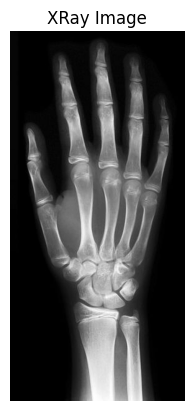

In [2]:
image = Image.open("xray.jpg")
image = np.array(image) # Convert the image to NumPy array
print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray') # Show the image in grayscale
plt.axis('off') # Turn off the axis
plt.title("XRay Image")
plt.show()

### Part II - Calculating Image Gradient

The next task is to calculate the image gradient using a **np.gradient** function within NumPy.

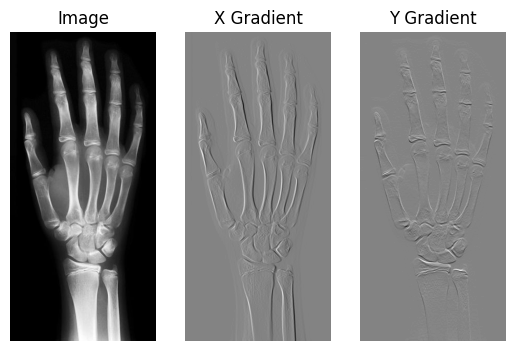

In [3]:
row_gradient, col_gradient = np.gradient(image) #None # TODO - use the np.gradient function to calculate the gradient

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()


One can observe that the gradient shows the regions of intensity changes with respect to a given direction. Calculating image (in general any N-dimensional function) gradient is a basic building block for numerous image processing tasks.

The next task is to define and implement a function called **our_gradient** that implements the same functionality as the **np.gradient** function. The result of the **our_gradient** function should be the same as of the **np.gradient**.

The function should implement the central differences:
$$ \frac{\partial f(x, y)}{\partial x} = \frac{f(x + 1, y) -  f(x - 1, y)}{2}$$
$$ \frac{\partial f(x, y)}{\partial y} = \frac{f(x, y + 1) -  f(x, y - 1)}{2}$$
, for each pair __(x, y)__ defining the 2-D image (hint: double for loop or proper array slicing/indexing).

In [4]:
def our_gradient(image):
    image_cpy = image.astype(np.float64)
    
    row_gradient = np.zeros_like(image_cpy)
    col_gradient = np.zeros_like(image_cpy)

    row_gradient[1:-1] = (image_cpy[2:] - image_cpy[:-2]) / 2
    col_gradient[:, 1:-1] = (image_cpy[:, 2:] - image_cpy[:, :-2]) / 2

    row_gradient[0] = image_cpy[1] - image_cpy[0]
    row_gradient[-1] = image_cpy[-1] - image_cpy[-2]
    col_gradient[:, 0] = image_cpy[:, 1] - image_cpy[:, 0]
    col_gradient[:, -1] = image_cpy[:, -1] - image_cpy[:, -2]
    
    return row_gradient, col_gradient

Test whether the proposed function works correctly:

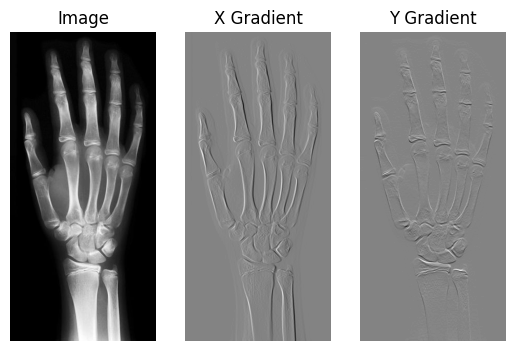

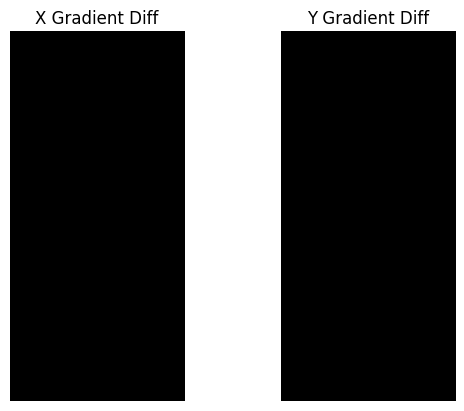

In [5]:
our_row_gradient, our_col_gradient = our_gradient(image)

# Again show the results - this time using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(our_col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(our_row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

# Show difference images

col_diff = col_gradient - our_col_gradient
row_diff = row_gradient - our_row_gradient

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(col_diff, cmap='gray') # TODO
plt.axis('off')
plt.title("X Gradient Diff")
plt.subplot(1, 2, 2)
plt.imshow(row_diff, cmap='gray') # TODO
plt.axis('off')
plt.title("Y Gradient Diff")
plt.show()

Moreover, perform a quantitative test by calculating the mean squared error (MSE) between the NumPy function and the implemented function:

In [6]:
# Calculate the mean squared error between NumPy function and the implemented function

mse = lambda a, b: np.mean(np.square(np.subtract(a, b)))
print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

MSE between row gradients: 0.0
MSE between column gradients: 0.0


### Part III - Binary Images

The next part is dedicated to binary images.

Binary images contain only two discrete values (e.g. True/False, 0/1, 0/255). They are a special kind of images that are often a result of the image processing/analysis pipeline (e.g. binary segmentation of a tumor).

Let's start with defining two functions generating synethetic binary images - circle and rectangle.

In [7]:
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
	circle = np.zeros((y_size, x_size))
	y, x = np.indices(circle.shape)
	circle[np.square(x-x_origin) + np.square(y-y_origin) <= np.square(radius)] = 255
	return circle

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	rectangle = np.zeros((y_size, x_size))
	x, y = np.meshgrid(np.linspace(0, x_size-1, x_size), np.linspace(0, y_size-1, y_size))
	
	rectangle[(x <= x_b + width/2) & (x >= x_b - width/2) & (y <= y_b + height/2) & (y >= y_b - height/2)] = 255	
	return rectangle

Let's try to use these functions to generate exemplary circle and rectangle.

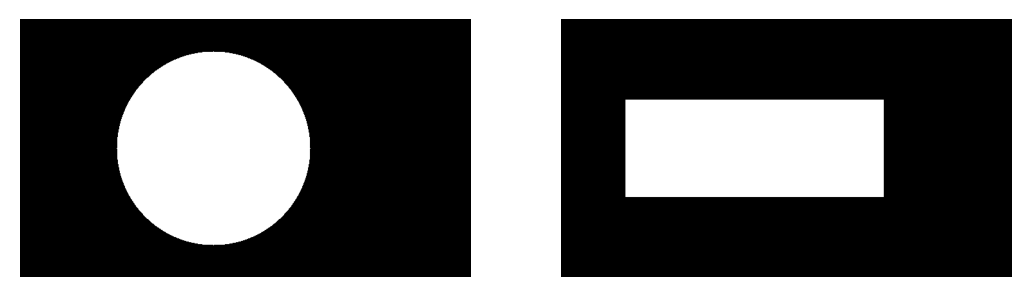

In [8]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
# To make the same picture I used x_size and y_size - I treat 3rd and 4th arguments as center
rectangle = generate_rectangle(x_size, y_size, x_origin, y_origin, width, height)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

Both the circle are sucessfully generated. Let's add a bit of binary noise now - it will be useful in the next part of the notebook.

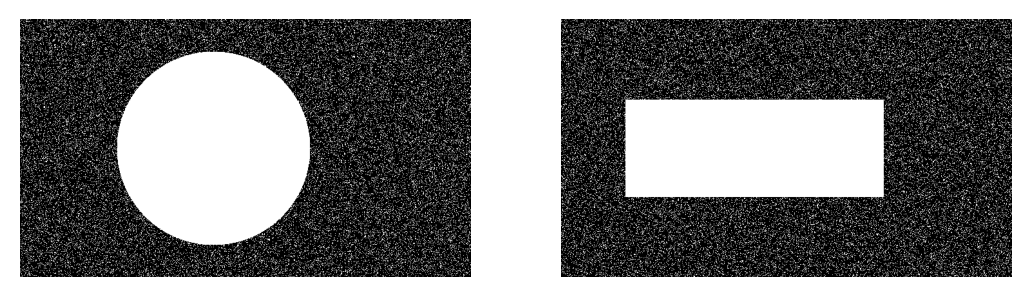

In [9]:
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

### Part IV - Morphological Operations

The most commonly used morphological operatons are:
<ol>
  <li> Erosion
  <li> Dilation
  <li> Opening (erosion followed by dilation)
  <li> Closing (dilation followed by erosion)
</ol>

They are common pre- or post-processing steps for binary images.

For a good description of morphological operations please visit: 
<ol>
 <li> https://en.wikipedia.org/wiki/Erosion_(morphology)
 <li> https://en.wikipedia.org/wiki/Dilation_(morphology)
 <li> https://en.wikipedia.org/wiki/Opening_(morphology)
 <li> https://en.wikipedia.org/wiki/Closing_(morphology)
</ol>

In this part you are going to use the function available in the SciPy library and then implement your own with similiar behavior.

Let's start with using the SciPy functions.

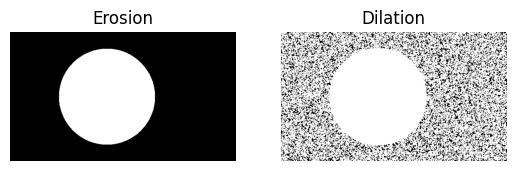

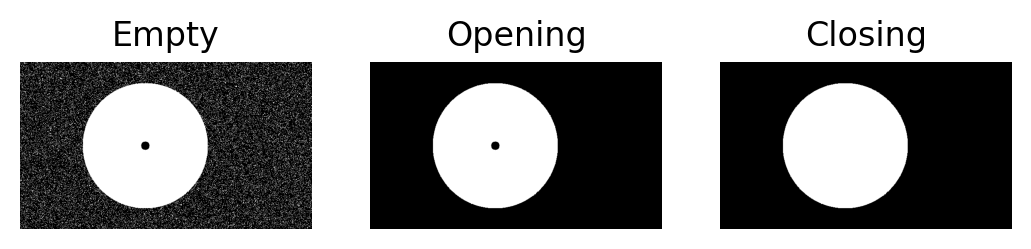

In [10]:
eroded_circle = nd.binary_erosion(circle, structure=np.ones((3,3))) # - perform binary erosion on the circle using SciPy
dilated_circle = nd.binary_dilation(circle, structure=np.ones((3,3))) # - perform binary dilation on the circle using SciPy

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
opened_circle = nd.binary_opening(empty_circle, structure=np.ones((10,10))) # - perform binary opening on the "empty_circle" using SciPy
closed_opened_circle = nd.binary_closing(opened_circle, structure=np.ones((20,20))) # - perform binary erosion on result of previous step using SciPy

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

Now implement your own functions, performing the same operations.

In [11]:
def erosion(image, structure=np.ones((3,3))):
	im_pad = np.pad(image, ((structure.shape[0]//2, structure.shape[0]//2), 
                            (structure.shape[1]//2, structure.shape[1]//2)), mode='constant')

	output_image = np.empty_like(image)
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			# Apply the structuring element at each position in the image
			region = im_pad[i:i+structure.shape[0], j:j+structure.shape[1]]
			output_image[i, j] = np.min(region)

	return output_image


def dilation(image, structure=np.ones((3,3))):
	im_pad = np.pad(image, ((structure.shape[0]//2, structure.shape[0]//2), 
                            (structure.shape[1]//2, structure.shape[1]//2)), mode='constant')

	output_image = np.empty_like(image)
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			# Apply the structuring element at each position in the image
			region = im_pad[i:i+structure.shape[0], j:j+structure.shape[1]]
			output_image[i, j] = np.max(region)

	return output_image

def opening(image, structure=np.ones((3,3))):
	im_cp = image.copy()
	er = erosion(im_cp, structure)
	dil = dilation(er, structure)
	
	return dil

def closing(image, structure=np.ones((3,3))):
	im_cp = image.copy()
	dil = dilation(im_cp, structure)
	er = erosion(dil, structure)
	
	return er

Test whether the implemented functions work correctly:

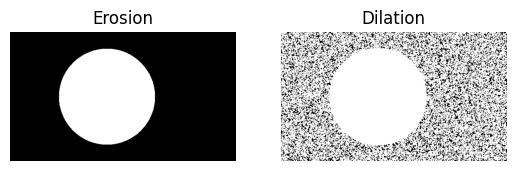

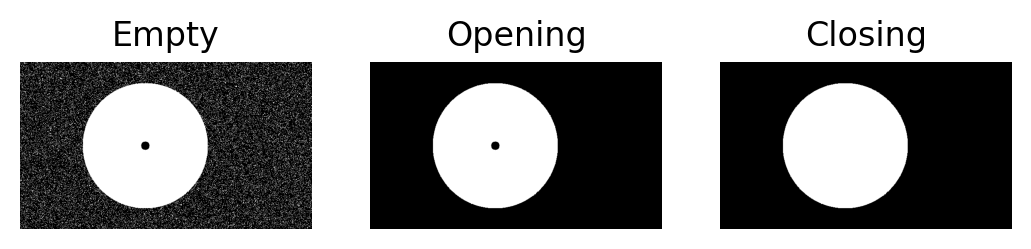

In [12]:
own_eroded_circle = erosion(circle, structure=np.ones((3,3))) # - perform binary erosion on the circle using the implemented function
own_dilated_circle = dilation(circle, structure=np.ones((3,3))) # - perform binary dilation on the circle using the implemented function

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
own_opened_circle = opening(empty_circle, structure=np.ones((9,9))) # - perform binary opening on the "empty_circle" using the implemented function
own_closed_opened_circle = closing(own_opened_circle, structure=np.ones((17,17))) #- perform binary erosion on result of previous step using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(own_eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(own_dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(own_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(own_closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

And also check the results quantitatively:

In [13]:
print(f"MSE between erosions: {mse(eroded_circle.astype(int), own_eroded_circle.astype(int))}") # TODO - calculate mse
print(f"MSE between dilations: {mse(dilated_circle.astype(int), own_dilated_circle.astype(int))}") # TODO - calculate mse
print(f"MSE between opening results: {mse(opened_circle.astype(int), own_opened_circle.astype(int))}") # TODO - calculate mse
print(f"MSE between closing results: {mse(closed_opened_circle.astype(int), own_closed_opened_circle.astype(int))}") # TODO - calculate mse

MSE between erosions: 0.0
MSE between dilations: 0.0
MSE between opening results: 0.0
MSE between closing results: 0.0


### Conclusion

This is the end of Laboratory 1. You should be now familiar with:
<ol>
  <li> Loading 2-D images using PIL library.
  <li> Generating synthetic 2-D images.
  <li> Implementing basic functions like gradient calculation or morphology operations.
</ol>

The next laboratory will discuss the convolution/correlation operators and how to implement basic neural networks in PyTorch.